## Adult Census Dataset - Meyhaa Buvanesh

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import random as rn
import matplotlib.pyplot as plt
from statistics import mean
%matplotlib inline

from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## Loading Data

In [2]:
adult = pd.read_csv('data/adult_data.csv')

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
A = adult[adult.salary == '>50K']
B = adult[adult.salary == '<=50K']

In [5]:
A.shape, B.shape

((7841, 15), (24720, 15))

## Transforming Data

### Adult Dataset

In [6]:
adult = adult.drop(['education'],axis=1)
adult['workclass'] = pd.factorize(adult['workclass'])[0]
adult['marital-status'] = pd.factorize(adult['marital-status'])[0]
adult['occupation'] = pd.factorize(adult['occupation'])[0]
adult['relationship'] = pd.factorize(adult['relationship'])[0]
adult['salary'] = pd.factorize(adult['salary'])[0]
adult['native-country'] = pd.factorize(adult['native-country'])[0]
adult['sex'] = pd.factorize(adult['sex'])[0]
adult['race'] = pd.factorize(adult['race'])[0]

In [7]:
adult.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,0,77516,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,13,1,3,2,1,1,0,0,40,1,0


## Classifiers

In [8]:
# To keep track of accuracies across the different classifiers for each of the Datasets
Adult_LR_acc = []
Adult_SVM_acc = []
Adult_RF_acc = []
Adult_RF_CV_acc = []
Adult_KNN_acc = []

In [9]:
def logistic_regression(X_train, X_test, Y_train, Y_test):
    LR = LogisticRegression()
    LR.fit(X_train, Y_train)
    LR_acc = LR.score(X_test, Y_test)
    return LR_acc

In [10]:
def svm(X_train, X_test, Y_train, Y_test):
    SVM = SVC()
    SVM.fit(X_train, Y_train)
    SVM_acc = SVM.score(X_test, Y_test)
    return SVM_acc

In [11]:
def random_forest(X_train, X_test, Y_train, Y_test):
    RFC = RandomForestClassifier(n_estimators = 200)
    RFC.fit(X_train, Y_train)
    RFC_acc = RFC.score(X_test, Y_test)
    RF_eval = cross_val_score(estimator = RFC, X = X_train, y = Y_train, cv = 10)
    return RFC_acc, RF_eval.mean()

### Data Shuffle 1: 80/20 Split

In [12]:
X_temp = adult.drop(['salary'],axis=1) 
X_adult = (X_temp - np.min(X_temp))/(np.max(X_temp)-np.min(X_temp)).values
Y_adult = adult.salary.values

In [13]:
X_adult_train1, X_adult_test1, Y_adult_train1, Y_adult_test1 = train_test_split(X_adult, Y_adult,
                                                                             test_size = 0.2, 
                                                                             shuffle = True)

In [14]:
# Logistic Regression for Adult Dataset 
LR_adult1_acc = logistic_regression(X_adult_train1, X_adult_test1, Y_adult_train1, Y_adult_test1)
Adult_LR_acc.append(LR_adult1_acc)
Adult_LR_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.8182097343773991]

In [15]:
# SVM For Adult Dataset
SVM_adult1_acc = svm(X_adult_train1, X_adult_test1, Y_adult_train1, Y_adult_test1)
Adult_SVM_acc.append(SVM_adult1_acc)
Adult_SVM_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.8248119146322739]

In [16]:
# Random Forest for Adult Dataset
RF_adult1_acc = random_forest(X_adult_train1, X_adult_test1, Y_adult_train1, Y_adult_test1)
Adult_RF_acc.append(RF_adult1_acc[0])
Adult_RF_CV_acc.append(RF_adult1_acc[1])
Adult_RF_acc, Adult_RF_CV_acc

([0.8509135575003839], [0.8609099352404351])

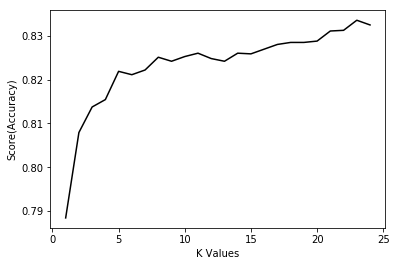

In [17]:
# KNN Model for Adult Dataset
scores1 = []
for val in range(1,25):
    KNNfind = KNeighborsClassifier(n_neighbors = val)
    KNNfind.fit(X_adult_train1,Y_adult_train1)
    scores1.append(KNNfind.score(X_adult_test1,Y_adult_test1))

plt.plot(range(1,25),scores1,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [18]:
Adult_KNN_acc.append(max(scores1))
Adult_KNN_acc

[0.8335636419468755]

In [19]:
'Optimal n is: ' + str(scores1.index(max(scores1))+ 1)

'Optimal n is: 23'

### Data Shuffle 2: 50/50 Split

In [20]:
X_adult_train2, X_adult_test2, Y_adult_train2, Y_adult_test2 = train_test_split(X_adult, Y_adult,
                                                                             test_size = 0.5, 
                                                                             shuffle = True)

In [21]:
# Logistic Regression for Adult Dataset 
LR_adult2_acc = logistic_regression(X_adult_train2, X_adult_test2, Y_adult_train2, Y_adult_test2)
Adult_LR_acc.append(LR_adult2_acc)
Adult_LR_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.8182097343773991, 0.8266691235182114]

In [22]:
# SVM For Adult Dataset
SVM_adult2_acc = svm(X_adult_train2, X_adult_test2, Y_adult_train2, Y_adult_test2)
Adult_SVM_acc.append(SVM_adult2_acc)
Adult_SVM_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.8248119146322739, 0.826239174497881]

In [23]:
# Random Forest for Adult Dataset
RF_adult2_acc = random_forest(X_adult_train2, X_adult_test2, Y_adult_train2, Y_adult_test2)
Adult_RF_acc.append(RF_adult2_acc[0])
Adult_RF_CV_acc.append(RF_adult2_acc[1])
Adult_RF_acc, Adult_RF_CV_acc

([0.8509135575003839, 0.8591609851974694],
 [0.8609099352404351, 0.8533773155539143])

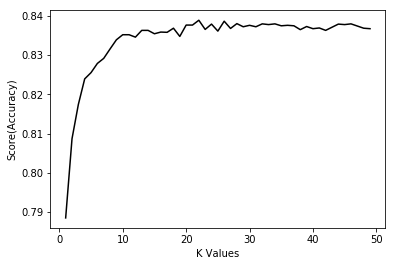

In [24]:
# KNN Model for Adult Dataset
scores2 = []
for val in range(1,50):
    KNNfind = KNeighborsClassifier(n_neighbors = val)
    KNNfind.fit(X_adult_train2,Y_adult_train2)
    scores2.append(KNNfind.score(X_adult_test2,Y_adult_test2))

plt.plot(range(1,50),scores2,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [25]:
Adult_KNN_acc.append(max(scores2))
Adult_KNN_acc

[0.8335636419468755, 0.8388305386647011]

In [26]:
'Optimal n is: ' + str(scores2.index(max(scores2))+ 1)

'Optimal n is: 22'

### Data Shuffle 3: 20/80 Split

In [27]:
X_adult_train3, X_adult_test3, Y_adult_train3, Y_adult_test3 = train_test_split(X_adult, Y_adult,
                                                                             test_size = 0.8, 
                                                                             shuffle = True)

In [28]:
# Logistic Regression for Adult Dataset 
LR_adult3_acc = logistic_regression(X_adult_train3, X_adult_test3, Y_adult_train3, Y_adult_test3)
Adult_LR_acc.append(LR_adult3_acc)
Adult_LR_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.8182097343773991, 0.8266691235182114, 0.8174594034319935]

In [29]:
# SVM For Adult Dataset
SVM_adult3_acc = svm(X_adult_train3, X_adult_test3, Y_adult_train3, Y_adult_test3)
Adult_SVM_acc.append(SVM_adult3_acc)
Adult_SVM_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.8248119146322739, 0.826239174497881, 0.8168451763983262]

In [30]:
# GridSearchCV 
# [0.1, 1, 10, 100]
# [10e-7, 10e-6, 10e-5, 10e-4]

classifier3 = SVC()
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_adult_svm3 = GridSearchCV(classifier3, param_grid=param, scoring='accuracy', cv=5)
grid_adult_svm3.fit(X_adult_train3, Y_adult_train3)
grid_adult_svm3.best_params_

{'C': 1.4, 'gamma': 1.4, 'kernel': 'rbf'}

In [32]:
# Running SVM with the best params from grid search
grid_SVM_adult_acc = grid_adult_svm3.best_estimator_.score(X_adult_test3, Y_adult_test3)
grid_SVM_adult_acc

0.8416445928826443

In [33]:
# Random Forest for Wine Dataset
RF_adult3_acc = random_forest(X_adult_train3, X_adult_test3, Y_adult_train3, Y_adult_test3)
Adult_RF_acc.append(RF_adult3_acc[0])
Adult_RF_CV_acc.append(RF_adult3_acc[1])
Adult_RF_acc, Adult_RF_CV_acc

([0.8509135575003839, 0.8591609851974694, 0.8538907443663865],
 [0.8609099352404351, 0.8533773155539143, 0.8575043165159928])

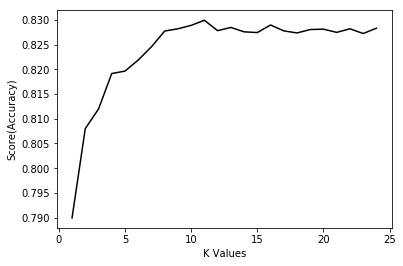

In [34]:
# KNN Model for Adult Dataset
scores3 = []
for val in range(1,25):
    KNNfind = KNeighborsClassifier(n_neighbors = val)
    KNNfind.fit(X_adult_train3,Y_adult_train3)
    scores3.append(KNNfind.score(X_adult_test3,Y_adult_test3))

plt.plot(range(1,25),scores3,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [35]:
Adult_KNN_acc.append(max(scores3))
Adult_KNN_acc

[0.8335636419468755, 0.8388305386647011, 0.829935890053361]

In [36]:
'Optimal n is: ' + str(scores3.index(max(scores3))+ 1)

'Optimal n is: 11'

### Accuracies 

#### Logistic Regression

In [37]:
Adult_LR_acc

[0.8182097343773991, 0.8266691235182114, 0.8174594034319935]

In [38]:
# Average
round(mean(Adult_LR_acc), 4)

0.8208

#### SVM

In [39]:
Adult_SVM_acc

[0.8248119146322739, 0.826239174497881, 0.8168451763983262]

In [40]:
# Average
round(mean(Adult_SVM_acc), 4)

0.8226

#### Random Forest

In [41]:
Adult_RF_acc

[0.8509135575003839, 0.8591609851974694, 0.8538907443663865]

In [42]:
# Average
round(mean(Adult_RF_acc), 4)

0.8547

In [43]:
# With Cross Validation
Adult_RF_CV_acc

[0.8609099352404351, 0.8533773155539143, 0.8575043165159928]

In [44]:
# Average
round(mean(Adult_RF_CV_acc), 4)#### KNN

0.8573

#### KNN

In [45]:
Adult_KNN_acc

[0.8335636419468755, 0.8388305386647011, 0.829935890053361]

In [46]:
# Average
round(mean(Adult_KNN_acc), 4)

0.8341